# Exploratory Data Analysis on the problem of `Predicting Passenger Transportation on the Spaceship Titanic`

Recently, I've stumbled upon this interesting Kaggle challenge called `Spaceship Titanic`. It's a fun twist on the classic Titanic dataset, but with a sci-fi spin. Basically, we've got this spaceship that had an accident, and now we're trying to predict which passengers were transported to an alternate dimension. Wild, right?

The thing is, this isn't just about solving this specific problem. So, I've stumbled upon this interesting Kaggle challenge called "Spaceship Titanic". It's a fun twist on the classic Titanic dataset, but with a sci-fi spin. Basically, we've got this spaceship that had an accident, and now we're trying to predict which passengers were transported to an alternate dimension. Wild, right?
The thing is, this isn't just about solving this specific problem. It's more important to understand how to tackle prediction problems of this nature in general. Before we begin developing any prediction models, we will go into some Exploratory Data Analysis (EDA) approaches that can truly help us understand our data better.

The interesting thing about this is that space transportation predictions aren't the only use for these EDA techniques. Once you get the hang of them, you can use the same strategies to solve a wide range of problems - such as identifying patients who are at high risk for a particular disease or predicting customer attrition for a firm.

We're sticking with our space travelers for the time being, though. By sifting through the data and looking for trends, we expect to increase the likelihood that our predictions will come true.


# Basic Imports

To automatically reload modules that have been imported into the active Python session, we'll use an IPython magic command. 

The `%load_ext` magic command is used to load an IPython extension. In this case, it loads the autoreload extension, which allows modules to be automatically reloaded when their source code changes. 

The `%autoreload` magic command is then used to configure the autoreload extension. The 2 parameter instructs the extension to reload any modules that were imported by those modules in addition to any modules loaded with the import statement. This guarantees that any modifications made to those modules' source code are reflected in the Python session that is now running. 

When writing and testing code, using %autoreload can be useful since it lets you make changes to the source code and see the effects right away without needing to manually reload the modules or restart the Python interpreter. 

To use `%autoreload`, you need to run the code in an IPython console or Jupyter notebook. It will not work in a regular Python console. 

In [1]:
%load_ext autoreload
%autoreload 2

Next, we'll import the `warnings` module and set it up to manage how warnings are displayed while our Python code runs. We'll configure the warnings module to ignore all warnings that come up during execution. This can be really helpful when you're running code that generates a lot of warnings, as it keeps the output clean and uncluttered.

We'll also import the `clear_output` function from the IPython.core.display module. This function is handy for clearing the output of the current console or notebook cell, making it easier to focus on the latest results without being distracted by previous output.

In [2]:
# Imports the warnings module from the Python standard library
import warnings

# Configuration to ignore all warnings that are generated during the execution of the code
warnings.filterwarnings('ignore')

# Imports the clear_output function from the IPython.core.display module
from IPython.core.display import clear_output

clear_output()

Let's start by importing some key libraries we'll need for our machine learning project. We'll grab `NumPy` and `Pandas` for data handling, `Scikit-learn` for ML tools, and `Matplotlib` for visualizations.

NumPy is great for number crunching, while Pandas helps us wrangle our data into shape. Matplotlib will let us create some nice charts to show off our results.

From Scikit-learn, we'll also pull in a few specific functions:
- StandardScaler to normalize our data
- train_test_split to divide our dataset for training and testing

For evaluating our model's performance, we'll use three handy metrics from sklearn:
- accuracy_score (how often our model gets it right)
- confusion_matrix (a breakdown of our predictions)
- classification_report (gives us precision, recall, and F1-score)

These tools will give us everything we need to build, train, and assess our machine learning model.

In [3]:
# Imports the NumPy library
import numpy as np

# Imports the Pandas library
import pandas as pd

# Imports the pyplot module of Matplotlib library
import matplotlib.pyplot as plt

# Imports the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Imports the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Imports three functions from the sklearn.metrics module: accuracy_score, confusion_matrix, and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Let's import some essential tools from PyTorch - it's our go-to library for deep learning in Python.

First up, we've got `torch.nn`. Think of it as a treasure chest of pre-made neural network building blocks. Need a specific type of layer? It's probably in there.

Then there's `torch.optim`. This is where we'll find our optimization algorithms - the secret sauce that helps our models learn and improve.

Lastly, we're pulling in a couple of handy classes from `torch.utils.data`:
- `DataLoader`: This guy helps us feed data to our model in bite-sized chunks.
- `TensorDataset`: It's like a container that keeps our data nicely organized in tensor form.

With these PyTorch tools in our belt, we're all set to dive into some serious deep learning!

In [4]:
# Imports the PyTorch library
import torch

# Imports the torch.nn module
import torch.nn as nn

# Imports the torch.optim module
import torch.optim as optim

# Imports two classes from the torch.utils.data module: DataLoader and TensorDataset
from torch.utils.data import DataLoader, TensorDataset

# Data Download:

Hey, time to snag our dataset! We're gonna raid Kaggle's treasure trove of data - specifically, their competition stash.

Check out this magic spell we're about to cast:

!kaggle competitions download -c spaceship-titanic -p ../Data/

Cool, huh? Let me give you the lowdown on what's happening here:

- That `!` at the start? It's like us whispering to our notebook, "Psst, this isn't Python. Run it in the shell, okay?"
- We're basically telling Kaggle, "Hey, hand over that competition data!"
- The `-c spaceship-titanic` bit? That's us pointing at the specific competition. Spaceship Titanic, folks! Sounds like we're in for some sci-fi shenanigans.
- And `-p ../Data/`? That's just us telling our computer where to stash the goods. We're tucking it into a `Data` folder just up the directory tree.

Hit enter, and boom! Our computer's gonna chat up Kaggle, grab that dataset, and dump it in our specified hidey-hole. Fair warning: it'll probably show up wearing a zip file costume, so we'll need to help it out of that before the real fun begins.

There you have it, folks! One line of code, and we've just scored ourselves a galactic Titanic's worth of data. Ready to boldly go where no data scientist has gone before?

In [5]:
# The kaggle competitions download command is used to download a dataset from a Kaggle competition
!kaggle competitions download -c spaceship-titanic -p ../Data/

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


Alright, time to crack open that data piñata we just downloaded! We're gonna use Python's `zipfile` module - it's like a digital Swiss Army knife for dealing with zipped-up files.

Think of it this way: we've got this compressed file, right? That's where `zipfile` comes in handy.

This little trick is super useful when you're dealing with datasets that come all bundled up in a ZIP file. It's pretty common in the data science world - kinda like getting a LEGO set where all the pieces are in sealed bags. We need to open those bags (or in this case, unzip our file) before we can start building our awesome machine learning models.

So, we'll use `zipfile` to unzip our data and spread it out in a nice, tidy folder. Then we'll be all set to dive in and start our data adventure!

In [6]:
# Imports the zipfile module
import zipfile

# Opens the ZIP file in read-only mode and assign it to the variable zip_ref
# The with statement is used to ensure that the file is properly closed after use
with zipfile.ZipFile('../Data/spaceship-titanic.zip', 'r') as zip_ref:

    # Extracts all the files from the ZIP archive and saves them to the specified directory
    zip_ref.extractall('../Data/')

Alright, let's set up our file paths! We're gonna use this cool thing called `Path` from Python's `pathlib` module. It's like a GPS for our computer - helps us tell our program where to find stuff.

We're gonna make two paths:
1. One for where our data lives
2. Another for where we'll stash our models

Using `Path` is pretty sweet because it works no matter what kind of computer you're using. It's like a universal translator for file locations. No more headaches about forward slashes, backslashes, or forgotten dots!

Think of it this way: we're giving our program a map so it knows exactly where to go to grab our data and where to save our machine learning creations. It's like leaving breadcrumbs for our code to follow. Neat, huh?

In [7]:
# Imports the Path class from the pathlib module
from pathlib import Path

# The posix path of the data and models are assigned to the corresponding variables
data_path = Path('../Data/')
model_path = Path('../Models/NN/')

# Data Exploration:

Alright, data wrangling time! We've use the trusty pandas library, so let's put it to work.

Here's what we're gonna do:
1. Grab our training data from 'train.csv'
2. Snag our testing data from 'test.csv'

We're using this nifty pandas trick called `pd.read_csv()`. It's like a vacuum cleaner for CSV files - just point it at your file, and whoosh! It sucks up all that data and spits out a nice, tidy DataFrame.

We're gonna call our training data `train_df_org` and our testing data `test_df_org`. The '_org' bit? That's just us being smart and keeping our original data safe. Always good to have a backup, right?

There's a ton of cool resources out there to help you with the pandas library.

pandas documentation: https://pandas.pydata.org/docs/

pandas tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

pandas cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [8]:
# Reads the 'train.csv' file and saves as a DataFrame object
train_df_org = pd.read_csv(data_path/'train.csv')

# Reads the 'test.csv' file and saves as a DataFrame object
test_df_org = pd.read_csv(data_path/'test.csv')

Let's copy the two DataFrame objects before we start manipulating them. This was, we can refer back to the original DataFrames whenever we need.

In [9]:
# Copies the original DataFrame objects to another 
train_df = train_df_org.copy()
test_df = test_df_org.copy()

Now, let's quickly inspect the contents of the large training DataFrame to get an overview of its structure and contents. We'll use the `head()` function from pandas to display the initial entries. This will give us a quick snapshot of our data without overwhelming us with the entire dataset.
By default, `head()` shows the first 5 rows, but we can adjust this if needed. For instance, `head(10)` would display the first 10 rows.
This initial inspection can help us understand the variables we're working with, identify any immediate data quality issues, and start formulating our analysis strategy.

In [10]:
# Shows the top five rows of the DataFrame holding the training data
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


We now take a quick look at the test data as well. Notice that the target column `Transported` is missing in the test data and our goal will be to predict the value of that target variable.

In [11]:
# Shows the top five rows of the DataFrame holding the test data
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Looking at our dataset, we've got some interesting stuff to work with here. Let's break it down:

We're dealing with 8693 passengers from the Spaceship Titanic. That's a pretty good number - should give us plenty to analyze without drowning in data.

We've got 14 different pieces of info for each passenger. That's like having 14 different ways to understand each person's story on this space journey.

Now, the types of data we're looking at:
- 7 columns are what we call `object` type - think text or categories. Could be things like where they're from or what class they're traveling in.
- 6 columns are numbers with decimal points. Might be stuff like age or ticket price.
- 1 column is just yes or no - that's probably our `Transported` column, telling us who got teleported and who didn`t.

Here's the tricky part - we're missing some info here and there. Like, for `HomePlanet`, we're missing details for 201 people. The `CryoSleep` column has the most gaps, with 217 missing entries.

The whole dataset takes up about 891.5 KB. That's not too hefty - your average computer can handle this no sweat.

So, what does all this mean for us?
1. We've got some cleaning up to do - filling in those missing bits.
2. We'll need to turn those text categories into numbers for our computer to understand.
3. Might need to adjust our number columns so they're all on the same scale.
4. And it looks like we're trying to predict a yes/no outcome - who gets transported and who doesn't.

That's the lay of the land. Ready to dig in and start making sense of this space data?

In [13]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [14]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Alright, let's chat about what we've discovered from our data snoop:

1. Every passenger's got their own special `PassengerId` - all 8693 of 'em. It's like everyone's wearing a different name tag.

2. Looks like our space travelers are coming from three different planets. Wonder if there's a galactic Ellis Island?

3. `CryoSleep` and `VIP` are yes-or-no deals. Either you're frozen or you're not, either you're a VIP or you're with us regular folk.

4. The `Cabin` situation is interesting. We've got 6560 different combos. Bet it's a mix of deck, room number, and which side of the ship you're on. Kinda like a cosmic hotel, eh?

5. Three places these folks could end up. Makes you wonder what's special about these three space destinations.

6. `Ages` range from 1 to 80. That's quite the spread! Maybe we could group these into kids, adults, seniors if we wanted to simplify things.

7. Those service columns (Room Service, Food Court, and such) have tons of different numbers. Guess some people really splurged on their space vacation!

8. `Names` are funky. We've got fewer unique names than passengers. Must be some space Smiths and Johnsons out there!

9. And finally, our million-dollar question: `Transported`. It's a simple yes or no, but predicting it? That's our space-age challenge!

So, what do you think? Ready to dive deeper into this cosmic dataset?

In [15]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Alright, let's break down what we're seeing in our cosmic data:

1. Good news! Every passenger's got their `PassengerId`, and we know whether they were `Transported` or not. No mystery there - it's like everyone remembered their space ticket and we know who made it to the other side.

2. Now, for the tricky part. All our other columns are playing a bit of hide-and-seek. Some info's gone missing:
  - `Age` is the least secretive - only 179 space travelers forgot to tell us how old they are.
  - `CryoSleep` is the most tight-lipped - 217 folks didn't let us know if they took the big freeze or not.

3. So, what're we gonna do about these gaps? We've got a couple of options:
  - For our number stuff, we might need to play psychic and guess the missing values. It's like filling in the blanks in a cosmic crossword puzzle.
  - For our category stuff (like where they're from or where they're going), we might just shrug and say "Unknown". After all, some space travelers like to keep an air of mystery!

It's not perfect, but hey, when you're dealing with space data, you gotta expect a few black holes here and there, right? What do you think - ready to start plugging these data leaks?

In [16]:
num_col = [col for col, dtype in train_df.dtypes.items() if dtype=='float64']
num_col

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [17]:
obj_col = [col for col, dtype in train_df.dtypes.items() if dtype=='object']
obj_col

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

Okay, so we've just done a bit of data sorting. It's like we've taken all our space passengers' info and split it into two piles:

1. Numbers: Stuff we can do math with, like ages and how much people spent on room service.
2. Categories: Things that are more like labels or groups, like where folks are from or if they're VIP.

This split is very important.

Now, here's where it gets a bit complicated. Some of our category stuff is actually just True/False questions. `CryoSleep` and `VIP` are like that - you're either in cryo or you're not, you're either a VIP or you're not. No middle ground in space!

Then we've got things like `HomePlanet` and `Destination`. These are more like multiple choice questions - there's a few options, but not a whole bunch.

Oh, and `PassengerId` and `Name`? They're like name tags. Useful for keeping track of who's who, but probably not something we'll use to predict who gets teleported. I mean, your name shouldn't determine your fate in space travel, right?

So, now that we've got our data all sorted out, what do you think our next move should be in this cosmic data adventure?

In [18]:
def remove_columns_from_dataframe(data_frame: pd.DataFrame, col_list: list) -> pd.DataFrame:
    """Function to remove columns from a dataframe

    Args:
        data_frame ([pd.DataFrame]): The dataframe from which selective columns need to be deleted
        col_list ([list]): The list of column names to be deleted

    Returns:
        pd.DataFrame: The dataframe modified by deleted columns
    """
    data_frame = data_frame.drop(col_list, axis=1)
    return data_frame
        

In [19]:
train_df = remove_columns_from_dataframe(train_df, ['PassengerId', 'Name'])

In [20]:
train_df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

Alright, now that we've sorted our space data, let's talk game plan:

1. For our number stuff, we're thinking about giving it a bit of a makeover. It's like making sure all our passengers are using the same units - we don't want some distances in light-years and others in parsecs, right? We might use fancy tools like `StandardScaler` or `MinMaxScaler`. It's like putting all our numerical data on a level playing field.

2. Now, for our category stuff, we've got to turn it into something our space computers can understand. It's like translating alien languages:
  - For our yes/no questions (like `CryoSleep` and `VIP`), we'll just use 0 and 1. Simple as flipping a cosmic coin.
  - For our multiple choice questions (like where folks are from), we might use something called one-hot encoding. It's like giving each option its own yes/no column. Sounds complicated, but trust me, the computers love it!

Next up, we're gonna take a peek at how our numbers are spread out. We're using something called KDE plots - think of it like taking a space telescope and looking at the shape of our data galaxies. It'll give us a good idea of what's normal and what's a bit... alien in our dataset.

So, ready to start transforming our raw space data into something our prediction models can sink their teeth into?

min:0.0 | max: 79.0 | skew: 0.41909658301471536 | mean: 28.82793046746535


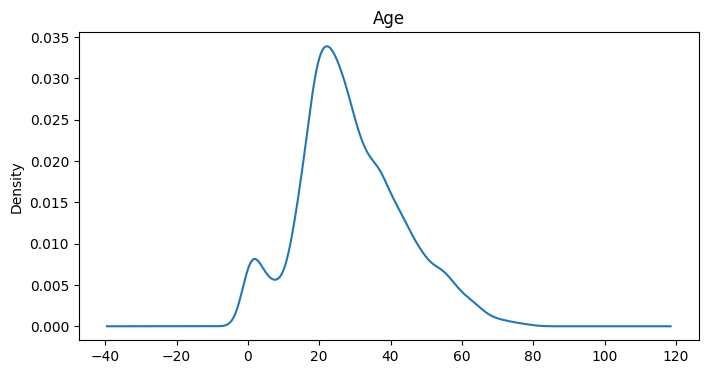

min:0.0 | max: 14327.0 | skew: 6.333014062092135 | mean: 224.687617481203


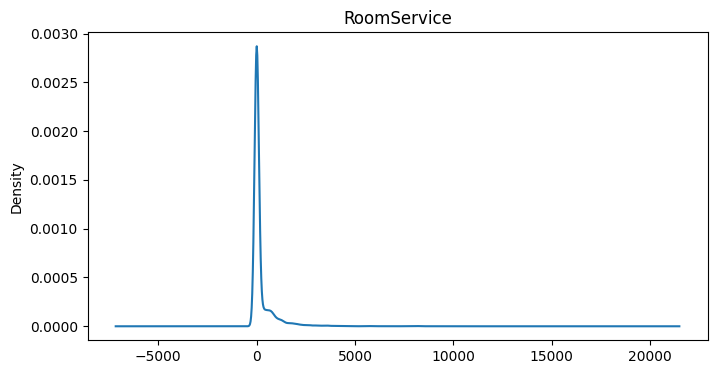

min:0.0 | max: 29813.0 | skew: 7.102227852514122 | mean: 458.07720329024676


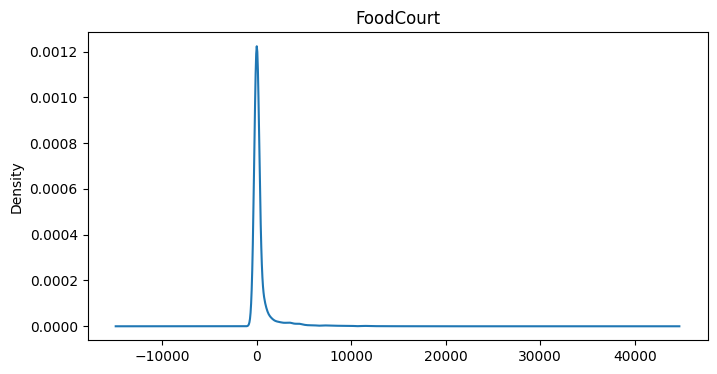

min:0.0 | max: 23492.0 | skew: 12.62756203889759 | mean: 173.72916912197996


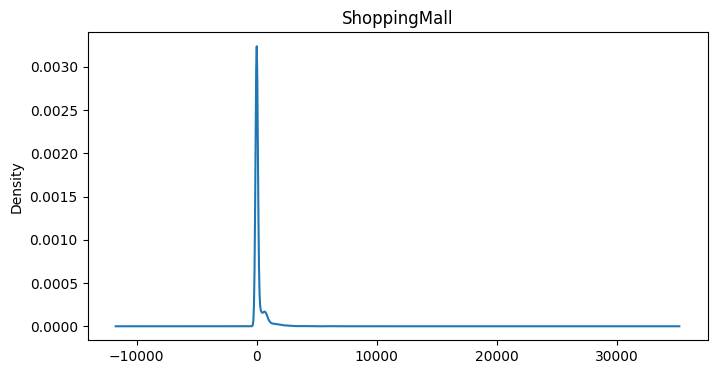

min:0.0 | max: 22408.0 | skew: 7.63601988471242 | mean: 311.1387779083431


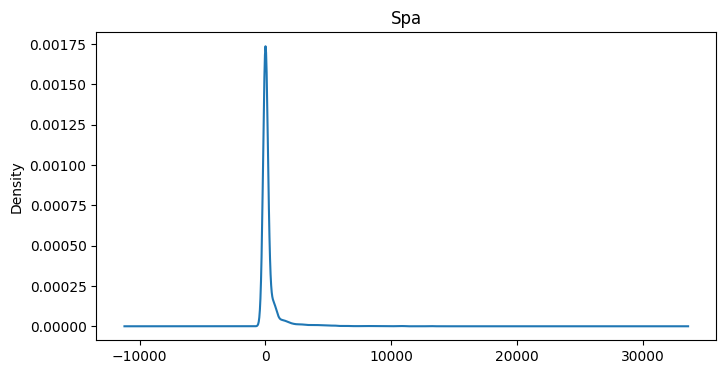

min:0.0 | max: 24133.0 | skew: 7.819731592048683 | mean: 304.8547912992357


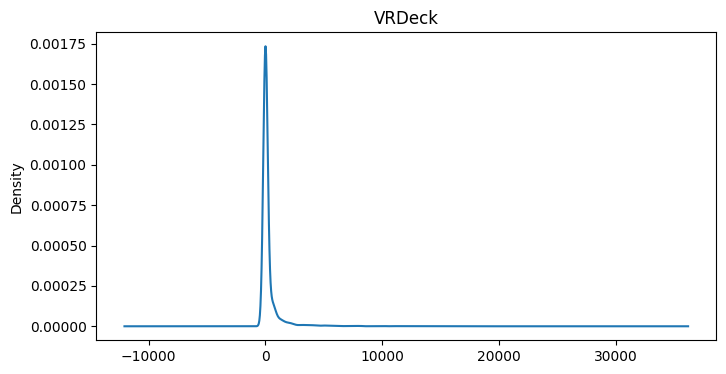

In [21]:
# Checkinge distributions of the numeric columns.
for col in num_col:
    column = train_df[col]
    min_val = column.min()
    max_val = column.max()
    skew = column.skew()
    mean = column.mean()
    
    plt.figure(figsize=(8, 4))
    plt.title(col)
    plt.ylabel('Count')
    
    print(f"min:{min_val} | max: {max_val} | skew: {skew} | mean: {mean}")
    
    train_df[col].plot(kind='kde')

    plt.show()

Alright, folks, let's break down what we're seeing in our passenger data:

1. `Age`: 
  Looks like we've got a pretty normal spread of ages, but with a bit of a tail on the older end. Average age is about 29, with our youngest at 0 (space babies!) and our oldest at 79. We've got a few more older folks than you might expect, pulling our average up a bit.

2. `RoomService`: 
  Whoa, talk about a party crowd! Most folks barely touched room service, but a few really went to town. Our average is about 225, but that's definitely getting pulled up by some big spenders.

3. `FoodCourt`: 
  Same story here. Most people were pretty chill about the food court, but some folks must've been living there! Average spend is 458, but I bet if you picked a random passenger, they spent way less.

4. `ShoppingMall`: 
  Even more extreme! Looks like we had a few shopaholics on board. Most people window-shopped, but a few went on a spree. Average spend is about 174.

5. `Spa`: 
  Some serious pampering going on for a few passengers! Average spa spend is about 311, but again, that's thanks to some serious spa enthusiasts.

6. `VRDeck`: 
  Virtual reality was a hit with some folks! Average usage is about 305, but most people probably just tried it once or twice.

So, what's this tell us about our space travelers?

1. For all our fancy amenities, most folks were pretty frugal. But a few big spenders really skewed things.
2. We might want to look at these numbers on a log scale - could make our patterns easier to spot.
3. Those big spenders might throw off our predictions. We might want to cap the spending at some point - like saying anything over the 99th percentile is just "a whole lot".
4. Age is the only thing that looks kind of normal - which is what you'd expect for, well, normal people.

Let's dig deeper into our space passenger profiles?

In [22]:
def discretize_age(data_frame: pd.DataFrame)->pd.DataFrame:
    """Discretize Age column into fixed sized bins

    Args:
        data_frame (pd.DataFrame): The data frame to be altered

    Returns:
        pd.DataFrame: The modified data frame with new column Age_group
    """
    # Define the bins for the age groups
    age_bins = [-1, 18, 30, 45, 60, 100]

    # Define the labels for the age groups
    age_labels = ['Child', 'Teen', 'Adult', 'Senior', 'Old']

    # Discretize the age column using the pd.cut() function
    data_frame['Age_group'] = pd.cut(data_frame['Age'], bins=age_bins, labels=age_labels)

    # Remove the Age column from the dataframe
    del data_frame['Age']

    return data_frame


In [23]:
discretize_age(train_df)

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group
0,Europa,False,B/0/P,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,Adult
1,Earth,False,F/0/S,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,Teen
2,Europa,False,A/0/S,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,Senior
3,Europa,False,A/0/S,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,Adult
4,Earth,False,F/1/S,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,True,0.0,6819.0,0.0,1643.0,74.0,False,Adult
8689,Earth,True,G/1499/S,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,False,Child
8690,Earth,False,G/1500/S,TRAPPIST-1e,False,0.0,0.0,1872.0,1.0,0.0,True,Teen
8691,Europa,False,E/608/S,55 Cancri e,False,0.0,1049.0,0.0,353.0,3235.0,False,Adult


Okay now, we've just done some cosmic age grouping! Instead of dealing with exact ages, we've sorted our space travelers into different life stages. It's like we've created space high school, but with more categories!

Here's what we've cooked up:
- `Child`: Our little astronauts, from barely born to 18
- `Teen`: Young adults, 18 to 30 (yeah, we're counting 20-somethings as teens in space!)
- `Adult`: Our main crew, 30 to 45
- `Senior`: The experienced travelers, 45 to 60
- `Old`: Our space veterans, 60 and up

Why'd we do this? Well, it's like sorting your space laundry:

1. It helps us spot any weird age-related patterns. Like, maybe babies and grandpas are more likely to get zapped to another dimension. You never know in space!

2. It saves us from sweating the small stuff. Is there really a big difference between a 40-year-old and a 41-year-old space traveler? Probably not, but there might be between a `Teen` and an `Adult`.

3. It makes our space stats easier to understand. Instead of saying "for every year older, you're 0.5% more likely to be teleported", we can say "Adults are 10% more likely to be teleported than Teens". Much easier to wrap your head around, right?

We've been a bit cheeky with our grouping. We started our `Child` group at -1 years old. No, we're not expecting time-traveling babies! It's just to catch any oopsies where someone might've entered 0 for a baby's age.

Oh, and we've ditched the original `Age` column. No need for belt and suspenders in space - we've got our shiny new `Age_group` to work with now.

So, ready to see how these cosmic age groups shake up our space transportation predictions?

In [24]:
num_col = [col for col, dtype in train_df.dtypes.items() if dtype=='float64']
num_col

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [25]:
obj_col = [col for col, dtype in train_df.dtypes.items() if dtype=='object']
obj_col

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   object  
 1   CryoSleep     8476 non-null   object  
 2   Cabin         8494 non-null   object  
 3   Destination   8511 non-null   object  
 4   VIP           8490 non-null   object  
 5   RoomService   8512 non-null   float64 
 6   FoodCourt     8510 non-null   float64 
 7   ShoppingMall  8485 non-null   float64 
 8   Spa           8510 non-null   float64 
 9   VRDeck        8505 non-null   float64 
 10  Transported   8693 non-null   bool    
 11  Age_group     8514 non-null   category
dtypes: bool(1), category(1), float64(5), object(5)
memory usage: 696.5+ KB


The key change here is that `Age` is no longer in our list of numerical columns. Instead, `Age_group` has been added to our categorical columns. This reflects the transformation we just performed.

In [27]:
def remove_anomalies(df:pd.DataFrame, column_names:list, multiplier=1.5)->pd.DataFrame:
    """Remove outliers from a data frame for selective columns

    Args:
        df (pd.DataFrame): The data frame to be altered
        column_names (list): list of column names to be operated on

    Returns:
        pd.DataFrame: The modified data frame after removing the outliers
    """
    for col in column_names:
        null_df = df[df[col].isna()]
        
        Q1 = df[col].quantile(0.01)
        Q3 = df[col].quantile(0.99)

        IQR = Q3 - Q1

        lower_bound = Q1 - (multiplier * IQR)
        upper_bound = Q3 + (multiplier * IQR)

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        df = pd.concat([df, null_df])
        
    return df


In [28]:
train_df = remove_anomalies(train_df,num_col)

In [29]:
train_df.shape

(8649, 12)

Following that, we perform an important data cleaning step: removing outliers from our numerical columns. The method used here is the Interquartile Range (IQR) method, which is a robust way of detecting outliers.

The function `remove_anomalies` does the following for each numerical column:
1. Calculates the 1st percentile (Q1) and 99th percentile (Q3)
2. Computes the Interquartile Range (IQR) as Q3 - Q1
3. Defines outliers as any points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
4. Removes these outliers from the dataset

From the output, we can see that our DataFrame shape has changed:

```
(8649, 12)
```

Previously, we had 8693 rows, and now we have 8649. This means we've removed 44 rows that contained outliers in one or more of the numerical columns.

This outlier removal serves several purposes:
1. It can improve the performance of many machine learning algorithms, which can be sensitive to extreme values.
2. It helps ensure that our model isn't unduly influenced by a small number of extreme cases.
3. It can sometimes correct for data entry errors or other anomalies in the data collection process.

However, it's important to note that we're making an assumption here that these extreme values are indeed outliers and not just rare but valid data points. In a real-world scenario, we might want to investigate these outliers further to understand why they're so extreme before removing them.

Also, notice that we're keeping the rows with null values (`null_df = df[df[col].isna()]`) and adding them back to our dataset after outlier removal. This ensures we don't lose data unnecessarily, as null values will be handled in a separate step.

In [30]:
def normalize(data_frame:pd.DataFrame, col_names:list)->pd.DataFrame:
    """Normalize selective columns of a data frame

    Args:
        data_frame (pd.DataFrame): The data frame to be altered
        column_names (list): list of column names to be normalized

    Returns:
        pd.DataFrame: The modified data frame with normalized columns
    """
    normalizer = StandardScaler()
    data_frame[col_names] = normalizer.fit_transform(data_frame[col_names])

    return data_frame

In [31]:
train_df = normalize(train_df, num_col)

In [32]:
train_df

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group
0,Europa,False,B/0/P,TRAPPIST-1e,False,-0.359961,-0.297860,-0.352491,-0.293324,-0.280320,False,Adult
1,Earth,False,F/0/S,TRAPPIST-1e,False,-0.177836,-0.291700,-0.297105,0.264363,-0.237639,True,Teen
2,Europa,False,A/0/S,TRAPPIST-1e,True,-0.288114,2.150043,-0.352491,6.527927,-0.232789,False,Senior
3,Europa,False,A/0/S,TRAPPIST-1e,False,-0.359961,0.580400,0.469440,3.088351,-0.093104,False,Adult
4,Earth,False,F/1/S,TRAPPIST-1e,False,0.146315,-0.249943,-0.017958,0.280616,-0.278380,True,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
6431,Earth,True,F/1411/P,TRAPPIST-1e,False,-0.359961,-0.297860,NaN,-0.293324,NaN,True,Child
8286,Earth,True,G/1427/S,55 Cancri e,False,-0.359961,-0.297860,NaN,-0.293324,NaN,True,Teen
4273,Earth,False,F/853/S,TRAPPIST-1e,False,-0.359961,-0.174644,0.790679,NaN,NaN,True,Teen
4986,Mars,True,F/1090/P,TRAPPIST-1e,False,-0.359961,-0.297860,-0.352491,NaN,NaN,True,Teen


Here, we proceed with normalization where they now represent how many standard deviations away from the mean a particular value is. For example, a value of 1 in the normalized `RoomService` column would indicate that this passenger spent 1 standard deviation more than the average on room service.

In [33]:
def null_replacement(data_frame:pd.DataFrame, col_names:list)->pd.DataFrame:
    """Replacing Null values from a data frame

    Args:
        data_frame (pd.DataFrame): The data frame to be altered
        column_names (list): list of column names where null value to be replaced

    Returns:
        pd.DataFrame: The modified data frame with replaced null values
    """
    for col in col_names:
        # import pdb; pdb.set_trace()
        col_values = data_frame[col]
        col_values.fillna(col_values.median(), inplace=True)
        
    return data_frame

In [34]:
train_df = null_replacement(train_df, num_col)

In [35]:
train_df.isna().sum()

HomePlanet      200
CryoSleep       216
Cabin           197
Destination     181
VIP             202
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Age_group       179
dtype: int64

Alright, now, we've just done some data cleaning! We're talking about getting rid of those weird, way-out-there numbers that might mess up our space predictions. It's like throwing out the moldy cheese from the back of the fridge - sure, it might be interesting, but it's probably not good for our space diet.

Here's what we did with our number-crunching magic:

1. We looked at each of our number columns (you know, stuff like how much folks spent at the space mall).
2. We figured out what "normal" looks like for each column. It's like finding out what the average space traveler does.
3. Then, we spotted the oddballs - the ones who spent way too much or way too little compared to everyone else.
4. We gently showed these oddballs the airlock. Not literally, of course! We just removed them from our data.

After our cleaning spree, we've gone from 8693 space travelers to 8649. That's 44 fewer rows in our cosmic spreadsheet. These 44 were our extreme cases - maybe they were secret space billionaires or stowaways!

Why did we do this? Well, it's like calibrating our space instruments:
1. It helps our prediction machines work better. They tend to get a bit confused by extreme values.
2. We don't want a handful of space party animals skewing our whole prediction.
3. Sometimes, these outliers are just mistakes. Like someone adding an extra zero when entering how much was spent on space smoothies.

But here's the thing - we're making a bit of an assumption. We're saying these extreme values are mistakes or anomalies, not just rare but real data. In the real world (or real space world), we might want to double-check these outliers before we spaced them.

Oh, and one more thing! We kept all the rows where we had missing info (those pesky nulls). We're not giving up on those - we'll deal with them later. It's like keeping the mysterious locked crates in our cargo hold. We don't know what's in them yet, but we're not tossing them out!

So, what do you think? Ready to see how our cleaned-up, outlier-free data changes our space predictions?

In [36]:
obj_col.append("Age_group")

In [37]:
obj_col

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Age_group']

In [38]:
train_df[obj_col].nunique()

HomePlanet        3
CryoSleep         2
Cabin          6540
Destination       3
VIP               2
Age_group         5
dtype: int64

In [39]:
train_df["CryoSleep"].head()

0    False
1    False
2    False
3    False
4    False
Name: CryoSleep, dtype: object

In [40]:
train_df["VIP"].head()

0    False
1    False
2     True
3    False
4    False
Name: VIP, dtype: object

These informations are crucial for deciding how to encode these categorical variables:

1. `HomePlanet` and Desti`nation both have 3 categories. These are good candidates for one-hot encoding.
2. `CryoSleep` and `VIP` are binary (2 categories). These can be simply encoded as 0 and 1.
3. `Cabin` has 6540 unique values. This high cardinality suggests that Cabin is a combination of multiple features (like deck, room number, and side). We might need to split this into separate features.
4. `Age_group`, which we created earlier, has 5 categories. This could be one-hot encoded or potentially treated as an ordinal variable.

We also inspect the first few values of `CryoSleep` and `VIP`. They will need to be converted to numerical values for our machine learning models.

In [41]:
def bool_to_binary(df:pd.DataFrame, cols:list)->pd.DataFrame:
    """AI is creating summary for bool_to_binary

    Args:
        df (pd.DataFrame): [description]
        cols (list): [description]

    Returns:
        pd.DataFrame: [description]
    """
    mapper = dict({True:1., False:0.})
    for col in cols:
        df[col] = df[col].map(mapper)
    return df


In [42]:
train_df = bool_to_binary(train_df, ["CryoSleep", "VIP"])
train_df["CryoSleep"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CryoSleep, dtype: float64

In [43]:
train_df["HomePlanet"].head(10)

0     Europa
1      Earth
2     Europa
3     Europa
4      Earth
5      Earth
6      Earth
8      Earth
9     Europa
11    Europa
Name: HomePlanet, dtype: object

In [44]:
train_df["Destination"].head(10)

0       TRAPPIST-1e
1       TRAPPIST-1e
2       TRAPPIST-1e
3       TRAPPIST-1e
4       TRAPPIST-1e
5     PSO J318.5-22
6       TRAPPIST-1e
8       TRAPPIST-1e
9       55 Cancri e
11      55 Cancri e
Name: Destination, dtype: object

In [45]:
train_df["Age_group"].head(10)

0      Adult
1       Teen
2     Senior
3      Adult
4      Child
5      Adult
6       Teen
8      Adult
9      Child
11     Adult
Name: Age_group, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Adult' < 'Senior' < 'Old']

In [46]:
train_df["Cabin"].head(10)

0     B/0/P
1     F/0/S
2     A/0/S
3     A/0/S
4     F/1/S
5     F/0/P
6     F/2/S
8     F/3/S
9     B/1/P
11    B/1/P
Name: Cabin, dtype: object

In the above cells, we convert our boolean features (`CryoSleep` and `VIP`) to binary numerical values. False has been mapped to 0.0 and True to 1.0. It's worth noting that we've converted these to float values rather than integers. This is often preferable in machine learning contexts as it allows for more flexibility in mathematical operations and is compatible with a wider range of algorithms and libraries.

Also further inspection helps us plan our next steps:
1. `HomePlanet` and `Destination` will need to be one-hot encoded.
2. `Age_group` could be one-hot encoded or treated as an ordinal variable.
3. `Cabin` will need to be split into separate features for `Deck`, `Number`, and `Side`.

In [47]:
def seggregate_cabin(df:pd.DataFrame)->pd.DataFrame:
    """AI is creating summary for seggregate_cabin

    Args:
        df (pd.DataFrame): [description]

    Returns:
        pd.DataFrame: [description]
    """
    df[["Deck", "Number", "Side"]]=df["Cabin"].str.split("/", expand=True)
    df["Number"] = df["Number"].astype(float)
    del df["Cabin"]

    return df

In [48]:
train_df = seggregate_cabin(train_df)
train_df.nunique()

HomePlanet         3
CryoSleep          2
Destination        3
VIP                2
RoomService     1263
FoodCourt       1489
ShoppingMall    1098
Spa             1306
VRDeck          1290
Transported        2
Age_group          5
Deck               8
Number          1816
Side               2
dtype: int64

In [49]:
def side_to_binary(df:pd.DataFrame)->pd.DataFrame:
    """AI is creating summary for side_to_binary

    Args:
        df (pd.DataFrame): [description]

    Returns:
        pd.DataFrame: [description]
    """
    mapper = dict({'P':1., 'S':0.})
    df["Side"] = df["Side"].map(mapper)
    return df

In [50]:
train_df = side_to_binary(train_df)
train_df["Side"].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Side, dtype: float64

Here, we perform operations splitting the `Cabin` feature into its constituent parts. From the output, we can see that we now have three new features:

1. `Deck`: A categorical variable representing the deck of the ship (A, B, C, etc.)
2. `Number`: A numerical variable representing the room number
3. `Side`: A binary variable representing which side of the ship the cabin is on (P or S)

We then convert the `Side` feature to binary values: P (`Port`) has been mapped to 1.0 and S (`Starboard`) to 0.0.

This segregation of the Cabin feature is beneficial for several reasons:
1. It allows our model to learn from each aspect of the cabin separately. For example, the deck might be more important than the specific room number in predicting transportation.
2. It reduces the high cardinality problem we had with the original Cabin feature.
3. It creates a mix of categorical (Deck), numerical (Number), and binary (Side) features, which can be handled appropriately by our model.

In [51]:
train_df["Number"].info()


<class 'pandas.core.series.Series'>
Index: 8649 entries, 0 to 6920
Series name: Number
Non-Null Count  Dtype  
--------------  -----  
8452 non-null   float64
dtypes: float64(1)
memory usage: 135.1 KB


In [52]:
train_df["Number"].min(), train_df["Number"].max()

(np.float64(0.0), np.float64(1894.0))

In [53]:
train_df["Number"].isna().sum()

np.int64(197)

In [54]:
train_df = null_replacement(train_df, ["Number"])

In [55]:
train_df["Number"].isna().sum()

np.int64(0)

In [56]:
def discretize_number(data_frame: pd.DataFrame)->pd.DataFrame:
   
    # Define the bins 
    bins = [-1.0, 500.0, 1000.0, 1500.0, 2000.0]

    # Define the labels 
    labels = ['tiny', 'small', 'medium', 'large']

    # Discretize the column using the pd.cut() function
    data_frame['Number'] = pd.cut(data_frame['Number'], bins=bins, labels=labels)

    return data_frame


In [57]:
train_df = discretize_number(train_df)

In [58]:
train_df['Number'].unique()

['tiny', 'small', 'medium', 'large']
Categories (4, object): ['tiny' < 'small' < 'medium' < 'large']

In these cells, we focus on processing the Number feature we extracted from Cabin. First, we examine its properties. 

We can see that it's a float64 type with 8452 non-null values, meaning there are 197 missing values.

We then check its range, we see that it ranges from 0 to 1894.

We handle the missing values by replacing them with the median value. Following this operation, we have no more missing values in the Number feature.

Finally, we discretize the Number feature into categories. This discretization serves several purposes:
1. It reduces the range of unique values, which can help prevent overfitting.
2. It allows the model to capture non-linear relationships between room number and the target variable.
3. It makes the feature more interpretable. For example, we might find that passengers in `large` numbered rooms are more likely to be transported.

In [59]:
def one_hot_encoding(df:pd.DataFrame, cols:list)->pd.DataFrame:
    """AI is creating summary for one_hot_encoding

    Args:
        df (pd.DataFrame): [description]
        cols (list): [description]

    Returns:
        pd.DataFrame: [description]
    """
    for col in cols:
        df_encoded = pd.get_dummies(df[col], prefix=col)
        del df[col]
        df = pd.concat([df, df_encoded], axis=1)

    return df


In [60]:
train_df = one_hot_encoding(train_df, ["HomePlanet", "Destination", "Deck", "Age_group", "Number"])

Okay, now, we're about to play a little game of bingo with our data! We're doing something called one-hot encoding. It's a fancy way of turning our category info into a format our space computers can understand better.

Let's take `HomePlanet` for example. We've got three options: Earth, Europa, and Mars. Instead of having one column with these planet names, we're going to create three new columns:

- `HomePlanet_Earth`
- `HomePlanet_Europa`
- `HomePlanet_Mars`

Now, for each passenger, we'll put a 1 in the column of their home planet, and 0s in the others. It's like checking off boxes on a form:

- If you're from Earth: [1, 0, 0]
- If you're from Europa: [0, 1, 0]
- If you're from Mars: [0, 0, 1]

We're doing this for all our category stuff - not just `HomePlanet`, but things like `CryoSleep`, `Destination`, and so on.

Why are we playing this cosmic checkbox game? Well, our space computers don't understand words like "Earth" or "Mars", but they love numbers! This way, we're translating our passenger info into a language our prediction machines can work with.

In [61]:
train_df.head(10)

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,HomePlanet_Earth,...,Deck_T,Age_group_Child,Age_group_Teen,Age_group_Adult,Age_group_Senior,Age_group_Old,Number_tiny,Number_small,Number_medium,Number_large
0,0.0,0.0,-0.359961,-0.297860,-0.352491,-0.293324,-0.280320,False,1.0,False,...,False,False,False,True,False,False,True,False,False,False
1,0.0,0.0,-0.177836,-0.291700,-0.297105,0.264363,-0.237639,True,0.0,True,...,False,False,True,False,False,False,True,False,False,False
2,0.0,1.0,-0.288114,2.150043,-0.352491,6.527927,-0.232789,False,0.0,False,...,False,False,False,False,True,False,True,False,False,False
3,0.0,0.0,-0.359961,0.580400,0.469440,3.088351,-0.093104,False,0.0,False,...,False,False,False,True,False,False,True,False,False,False
4,0.0,0.0,0.146315,-0.249943,-0.017958,0.280616,-0.278380,True,0.0,True,...,False,True,False,False,False,False,True,False,False,False
5,0.0,0.0,-0.359961,0.032771,-0.352491,0.002281,-0.280320,True,1.0,True,...,False,False,False,True,False,False,True,False,False,False
6,0.0,0.0,-0.289784,0.755642,-0.345844,-0.293324,-0.280320,True,0.0,True,...,False,False,True,False,False,False,True,False,False,False
8,0.0,0.0,-0.359961,0.239501,-0.314828,-0.073906,-0.280320,True,0.0,True,...,False,False,False,True,False,False,True,False,False,False
9,1.0,0.0,-0.359961,-0.297860,-0.352491,-0.293324,-0.280320,True,1.0,False,...,False,True,False,False,False,False,True,False,False,False
11,0.0,0.0,-0.294797,4.695835,0.952407,-0.181583,-0.160037,True,1.0,False,...,False,False,False,True,False,False,True,False,False,False


In [62]:
train_df.columns

Index(['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'Side', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Age_group_Child', 'Age_group_Teen', 'Age_group_Adult',
       'Age_group_Senior', 'Age_group_Old', 'Number_tiny', 'Number_small',
       'Number_medium', 'Number_large'],
      dtype='object')

However, it's worth noting that one-hot encoding can significantly increase the number of features in our dataset, which can lead to the curse of dimensionality if we have many categorical variables with many categories each. In this case, our categorical variables have a relatively small number of categories, so this shouldn't be a major concern.

In [63]:
train_df["Transported"] = train_df["Transported"].astype(int)
train_df["Transported"].head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [64]:
train_df["VIP"].isna().sum()

np.int64(202)

In [65]:
train_df["VIP"].fillna(False, inplace=True)
train_df["VIP"] =train_df["VIP"].astype(float)
train_df["VIP"].isna().sum()

np.int64(0)

In [66]:
train_df.isna().sum()

CryoSleep                    216
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Transported                    0
Side                         197
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Age_group_Child                0
Age_group_Teen                 0
Age_group_Adult                0
Age_group_Senior               0
Age_group_Old                  0
Number_tiny                    0
Number_small                   0
Number_med

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8649 entries, 0 to 6920
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8433 non-null   float64
 1   VIP                        8649 non-null   float64
 2   RoomService                8649 non-null   float64
 3   FoodCourt                  8649 non-null   float64
 4   ShoppingMall               8649 non-null   float64
 5   Spa                        8649 non-null   float64
 6   VRDeck                     8649 non-null   float64
 7   Transported                8649 non-null   int64  
 8   Side                       8452 non-null   float64
 9   HomePlanet_Earth           8649 non-null   bool   
 10  HomePlanet_Europa          8649 non-null   bool   
 11  HomePlanet_Mars            8649 non-null   bool   
 12  Destination_55 Cancri e    8649 non-null   bool   
 13  Destination_PSO J318.5-22  8649 non-null   bool   
 1

In [68]:
train_df["CryoSleep"].fillna(train_df["CryoSleep"].median(axis=0), inplace=True)
train_df["Side"].fillna(train_df["Side"].mode()[0], inplace=True)
train_df.isna().sum()

CryoSleep                    0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Side                         0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Age_group_Child              0
Age_group_Teen               0
Age_group_Adult              0
Age_group_Senior             0
Age_group_Old                0
Number_tiny                  0
Number_small                 0
Number_medium                0
Number_large                 0
dtype: i

In these final preparation steps, we make sure our data is in the right format for model training. 

We convert our target variable `Transported` to integer type.

This is necessary because many machine learning algorithms expect the target variable to be numeric.

We then handle any remaining null values. For the VIP column, we fill null values with False and convert to float.

For `CryoSleep` and `Side`, we use median imputation.

After these operations, we have no more null values in our dataset. This is crucial because most machine learning algorithms cannot handle null values.

Finally, we inspect our fully processed DataFrame and we save it to disk.

In [69]:
train_df.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,HomePlanet_Earth,...,Deck_T,Age_group_Child,Age_group_Teen,Age_group_Adult,Age_group_Senior,Age_group_Old,Number_tiny,Number_small,Number_medium,Number_large
0,0.0,0.0,-0.359961,-0.297860,-0.352491,-0.293324,-0.280320,0,1.0,False,...,False,False,False,True,False,False,True,False,False,False
1,0.0,0.0,-0.177836,-0.291700,-0.297105,0.264363,-0.237639,1,0.0,True,...,False,False,True,False,False,False,True,False,False,False
2,0.0,1.0,-0.288114,2.150043,-0.352491,6.527927,-0.232789,0,0.0,False,...,False,False,False,False,True,False,True,False,False,False
3,0.0,0.0,-0.359961,0.580400,0.469440,3.088351,-0.093104,0,0.0,False,...,False,False,False,True,False,False,True,False,False,False
4,0.0,0.0,0.146315,-0.249943,-0.017958,0.280616,-0.278380,1,0.0,True,...,False,True,False,False,False,False,True,False,False,False


In [70]:
train_df.to_csv(data_path/"train_df_processed.csv", index=False)

# Training of a Feedforward Neural network for Binary Classification

In [71]:
df = pd.read_csv(data_path/"train_df_processed.csv")
# df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
df.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,HomePlanet_Earth,...,Deck_T,Age_group_Child,Age_group_Teen,Age_group_Adult,Age_group_Senior,Age_group_Old,Number_tiny,Number_small,Number_medium,Number_large
0,0.0,0.0,-0.359961,-0.297860,-0.352491,-0.293324,-0.280320,0,1.0,False,...,False,False,False,True,False,False,True,False,False,False
1,0.0,0.0,-0.177836,-0.291700,-0.297105,0.264363,-0.237639,1,0.0,True,...,False,False,True,False,False,False,True,False,False,False
2,0.0,1.0,-0.288114,2.150043,-0.352491,6.527927,-0.232789,0,0.0,False,...,False,False,False,False,True,False,True,False,False,False
3,0.0,0.0,-0.359961,0.580400,0.469440,3.088351,-0.093104,0,0.0,False,...,False,False,False,True,False,False,True,False,False,False
4,0.0,0.0,0.146315,-0.249943,-0.017958,0.280616,-0.278380,1,0.0,True,...,False,True,False,False,False,False,True,False,False,False


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8649 non-null   float64
 1   VIP                        8649 non-null   float64
 2   RoomService                8649 non-null   float64
 3   FoodCourt                  8649 non-null   float64
 4   ShoppingMall               8649 non-null   float64
 5   Spa                        8649 non-null   float64
 6   VRDeck                     8649 non-null   float64
 7   Transported                8649 non-null   int64  
 8   Side                       8649 non-null   float64
 9   HomePlanet_Earth           8649 non-null   bool   
 10  HomePlanet_Europa          8649 non-null   bool   
 11  HomePlanet_Mars            8649 non-null   bool   
 12  Destination_55 Cancri e    8649 non-null   bool   
 13  Destination_PSO J318.5-22  8649 non-null   bool 

In [73]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8649 non-null   float64
 1   VIP                        8649 non-null   float64
 2   RoomService                8649 non-null   float64
 3   FoodCourt                  8649 non-null   float64
 4   ShoppingMall               8649 non-null   float64
 5   Spa                        8649 non-null   float64
 6   VRDeck                     8649 non-null   float64
 7   Transported                8649 non-null   float64
 8   Side                       8649 non-null   float64
 9   HomePlanet_Earth           8649 non-null   float64
 10  HomePlanet_Europa          8649 non-null   float64
 11  HomePlanet_Mars            8649 non-null   float64
 12  Destination_55 Cancri e    8649 non-null   float64
 13  Destination_PSO J318.5-22  8649 non-null   float

In [74]:
y = df["Transported"].astype(int)
X = df.drop(["Transported"], axis = 1)

In the traning step so far, we have completed some standard steps in preparing data for supervised learning. Our target variable `Transported` is converted to integer type (0 or 1), while X contains all other columns in float32 that will be used as features to predict `Transported`.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train.shape

(6919, 31)

Alright, we're about to launch our data into training mode! Here's the scoop:

1. We're taking a big chunk of our cosmic passenger list - about 80% of it (that's 6919 lucky space travelers) - and we're using that to teach our prediction machine. It's like we're sending these passengers to Space Prediction School!

2. After all our data tidying and transforming, we've ended up with 31 different bits of info about each passenger. It's like we've got 31 different clues about each person to help us guess if they're going to get teleported or not.

Now, why aren't we using all our data for training? Well, it's like we're holding a space quiz. We use most of our info to study (that's our training data), but we keep some back to test ourselves later (that's our test data). This way, we can see how well we've learned and if we can make good guesses about passengers we haven't seen before.

Oh, and see that `random_state=42` bit? That's our random number generator. We're setting it to 42 (the answer to life, the universe, and everything, of course!) so that every time we run this, we get the same split. It's like making sure we're always dealing the cards the same way in a casino.

In [76]:
class NNBinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(NNBinaryClassifier, self).__init__()
        self.input_size = input_size
        self.model = nn.Sequential(
            nn.Linear(self.input_size, 64), 
            nn.BatchNorm1d(64), 
            nn.ReLU(), 
            nn.Dropout(0.5), 
            nn.Linear(64, 128), 
            nn.BatchNorm1d(128), 
            nn.ReLU(), 
            nn.Dropout(0.5),
            nn.Linear(128, 64), 
            nn.BatchNorm1d(64), 
            nn.ReLU(), 
            nn.Dropout(0.5),
            nn.Linear(64, 32), 
            nn.BatchNorm1d(32), 
            nn.ReLU(), 
            nn.Dropout(0.5),
            nn.Linear(32, 1), 
            nn.Sigmoid()
        )

    def forward(self, data):
        output = self.model(data)
        return output

Okay, folks, we're about to build our very own nural network designed to crack the code of who's getting teleported on our space journey. Let's break down this network:

1. First, we've got our input layer. It's like the ears and eyes of our network, taking in all 31 pieces of info we've gathered about each passenger.

2. Then we've got our first hidden layer. Think of it as 64 little neurons, each looking at the info in a different way. They're using something called ReLU activation - it's like their intuition, helping them spot patterns. We've also got batch normalization (keeping their work consistent) and 50% dropout (making sure they don't become one-trick ponies).

3. Our second hidden layer is even bigger - 128 space neurons! They're taking what the first layer found and digging deeper.

4. The third layer dials it back to 64 neurons again. They're starting to piece together the big picture.

5. Our fourth layer narrows it down to 32 final analysts. They're putting the finishing touches on our prediction.

6. Finally, we've got our output layer. This is the fortune teller of our space brain. It gives us a number between 0 and 1, kind of like a percentage chance of getting teleported.

All these layers work together like an assembly line, each one refining our prediction a little more. The ReLU activation is like giving our neurons magnifying glasses, batch normalization is like making sure they're all using the same scale, and dropout is like randomly taking away some of their tools so they don't rely on them too much.

In [85]:
binaryClf = NNBinaryClassifier(X_train.shape[1])
criterion  = nn.BCELoss()
optimizer = optim.Adam(binaryClf.parameters(), lr = 0.0001)
epochs = 500
bs = 16

We're using `Binary Cross Entropy` Loss, which is appropriate for binary classification problems, and the `Adam` optimizer with a learning rate of 0.0001. We'll train for 500 epochs with a batch size of 16.

In [86]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

In [87]:
X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([6919, 31]),
 torch.Size([1730, 31]),
 torch.Size([6919, 1]),
 torch.Size([1730, 1]))

In [88]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)

The above few steps, prepares our data in a format that PyTorch can efficiently use during training.

In [89]:
train_loss = []
test_loss = []

for epoch in range(epochs):
    binaryClf.train()
    epoch_train_loss = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        batch_y_hat = binaryClf(batch_X)
        batch_loss = criterion(batch_y_hat, batch_y)
        batch_loss.backward()
        optimizer.step()
        epoch_train_loss += batch_loss.item()
    
    epoch_train_loss /= len(train_loader)

    if epoch % 100 == 0:
        binaryClf.eval()
        with torch.no_grad():
            y_hat = binaryClf(X_test_tensor)
            y_hat = torch.clamp(y_hat, 0, 1)
            val_loss = criterion(y_hat, y_test_tensor).item()
        train_loss.append(epoch_train_loss)
        test_loss.append(val_loss)

        print(f"After epoch {epoch}, train loss : {epoch_train_loss}, test loss : {val_loss}.")

After epoch 0, train loss : 0.7135845349787564, test loss : 0.6811375021934509.
After epoch 100, train loss : 0.45995591704757327, test loss : 0.40071630477905273.
After epoch 200, train loss : 0.44159275141929644, test loss : 0.4013420045375824.
After epoch 300, train loss : 0.4348492599662402, test loss : 0.3940751850605011.
After epoch 400, train loss : 0.4317046499211023, test loss : 0.39686837792396545.


We can see that both training and test loss decrease over time, indicating that our model is learning. The fact that test loss is decreasing along with training loss suggests that our model is generalizing well and not overfitting.

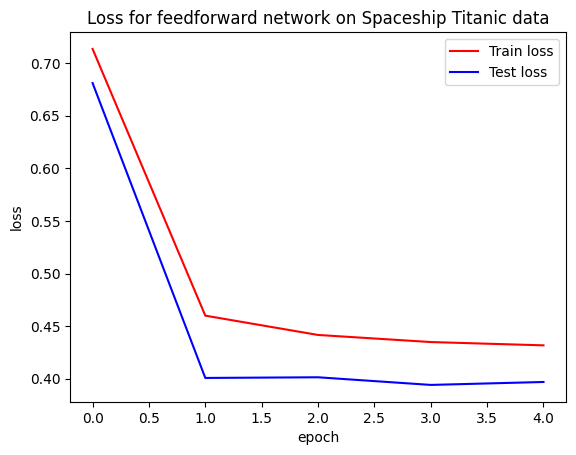

In [90]:
plt.plot(train_loss, label="Train loss", color="red")
plt.plot(test_loss, label="Test loss", color='blue')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss for feedforward network on Spaceship Titanic data")
plt.legend()
plt.show()

The resulting plot shows both training and test loss decreasing and converging, which is a good sign. It suggests that our model is learning effectively and generalizing well to unseen data.

Then, we save the model to disk for allowing us to use it later for predictions without having to retrain.

In [91]:
torch.save(binaryClf.state_dict(), model_path)

# Test Set Prediction

In [101]:
binaryClf2 = NNBinaryClassifier(X_train.shape[1])
binaryClf2.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [102]:
binaryClf2.eval()

NNBinaryClassifier(
  (model): Sequential(
    (0): Linear(in_features=31, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=32, out_features=1, bias=True)
    (17): Sigmoid()
  )
)

In [119]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
with torch.no_grad():
    y_hat_logits = binaryClf2(X_test_tensor)

In [120]:
y_hat = (y_hat_logits > 0.5).float()

In [122]:
accuracy = accuracy_score(y_test, y_hat)

In [123]:
accuracy

0.8069364161849711

We do inference on the unseen test data. 

The output of the accuracy `0.8069364161849711` indicates that our model correctly predicts whether a passenger was transported about 80.69% of the time. 

This is a solid performance for a binary classification task.

In [127]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       897
           1       0.84      0.74      0.79       833

    accuracy                           0.81      1730
   macro avg       0.81      0.80      0.81      1730
weighted avg       0.81      0.81      0.81      1730



In [131]:
print(confusion_matrix(y_test, y_hat, labels=[0, 1]))

[[782 115]
 [219 614]]


Alright, let's break down how our network performance! We've got a bunch of numbers here, but don't worry - I'll translate this.

First off, our model seems to be a bit better at spotting who's staying on the ship versus who's getting zapped away. It's like our space brain has a slight preference for spotting the homebodies.

Let's look at the non-transported folks:
- Pros: We're catching most of these stayers. If you're not getting teleported, our model is pretty good at figuring that out.
- Cons: We're also calling some teleported people "non-transported" by mistake. Oops!

Now for the transported passengers:
- Pros: When we say someone's getting zapped, we're usually right.
- Cons: We're missing some zapped folks, accidentally calling them staynon-transporteders.

Overall, our network is doing a pretty balanced job. It's not perfect, but hey, predicting space teleportation isn't easy!

Now, let's look at our classification scoreboard:
- 782 times, we correctly said "You're staying on the ship!"
- 115 times, we said "You're getting zapped!" but they actually stayed. Awkward...
- 219 times, we said "You're staying!" but they got zapped. Surprise teleportation!
- 614 times, we correctly said "You're getting zapped!"

So, what's the conclusion here? 

Our network is doing a pretty good job, but it's got a slight preference for keeping people on the ship. It's like our model is a bit of a worrier - it would rather tell you to pack your bags than have you accidentally left behind!

Not too shabby for our first attempt at predicting space teleportation, right? But remember, in machine learning, there's always room for improvement.